In [256]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Spark 데이터 종류

- RDD : Low-level API에 해당 하는 데이터, 스파크에서 동작하는 모든 데이터는 결국 RDD형태로 연산된다  
- DataFrame : 열과 행으로 이루어진 테이블 형태의 데이터
- DataSet : 한가지 타입의 값만 저장할 수 있는 DataFrame. PySpark에서는 사용하지 않음

## RDD 

### Resillient Distributed Data

Resillient : 회복력 있는  
Distributed : 분산  
Data : 데이터  
 * Resilient : 장애가 발생할 경우 자동으로 데이터를 복구
 * Distributed : 데이터를 읽고 쓸 때 데이터를 파티셔닝 하여 병렬로 읽고 쓴다. 직렬로 모두 읽을 때 보다 속도가 빠르다
 
 
### RDD의 특징

 - Read Only : 변경불가능 객체
 - Lazy Evaluation : 늦은 수행


### RDD 파티셔닝

- 커다란 RDD를 처음 부터 끝까지 직렬로 읽고 쓰면 시간이 오래 걸린다.
- RDD를 작은 부분(Partition) 으로 쪼개 각 Patition 을 병렬로 읽고 써 실행속도를 향상시킬 수 있다.
- Patition을 나눠줄때는 스파크 클러스터 환경의 cpu core 숫자에 맞춰주는 것이 속도 측면에서 유리하다.
  - 개발자가 partition을 명시할 수도 있다.
    - 단, 개발자가 명시한다고 해서 무조건 따르지는 않는다. spark rdd 입장에서는 최적화된 partition을 사용 (데이터가 아주 많은 상황이 아니면 명시할 필요는 없다.)


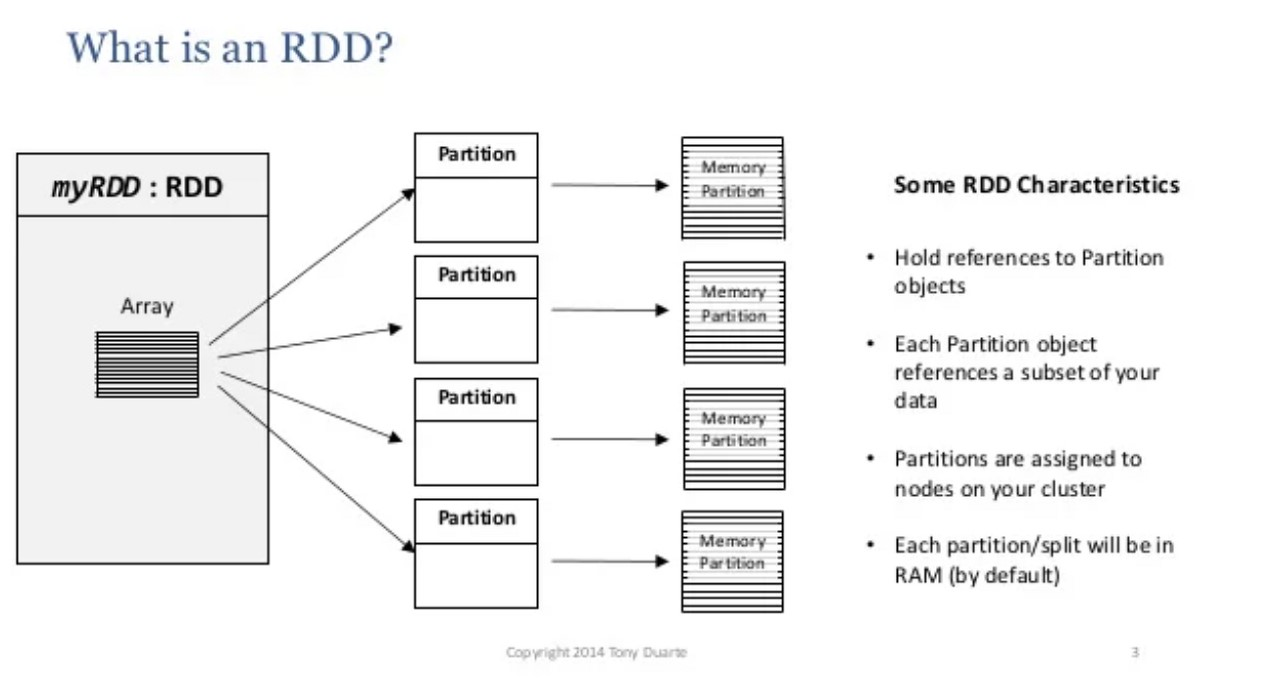

#### * cpu 코어가 3개일때 파티셔닝 예시

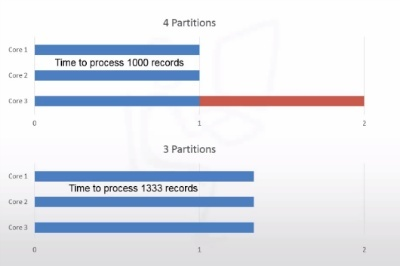

## RDD - 생성


가이드
https://spark.apache.org/docs/latest/rdd-programming-guide.html#resilient-distributed-datasets-rdds

In [257]:
# pyspark jupyter로 실행했을 경우 생략 - 나는 pyspark와 spark shell을 연결해놓은 상태
# from pyspark import SparkContext, SparkConf

In [258]:
# pyspark jupyter로 실행했을 경우 생략
# sc.stop()

In [259]:
# pyspark jupyter로 실행했을 경우 생략
# conf = SparkConf().setAppName('mysite').setMaster('local')
# sc = SparkContext(conf=conf)

# 현재 실습 환경에서는 아래부터 하면 됨

In [260]:
# sc는 spark context : spark 기능(rdd)을 사용하기 위한 객체변수
# sc.parallelize(data) 메서드로 생성
list_tmp = ["짜장면", "마라탕", "짬뽕", "떡볶이",
        "쌀국수", "짬뽕", "짜장면", "짜장면",
        "짜장면",  "라면", "우동", "라면"]
# 파이썬 객체인 리스트를 spark rdd객체로 변환
foods = sc.parallelize(list_tmp)

In [261]:
type(foods)

pyspark.rdd.RDD

In [262]:
foods

ParallelCollectionRDD[275] at readRDDFromFile at PythonRDD.scala:274

In [263]:
# rdd로 만들 데이터, 파티셔닝 수(몇개의 파티션으로 만들었나)
# 전부 동일하게 파티션 수가 반환되지는 않는다.
foods.getNumPartitions()

2

### 한개의 파티션에 저장하도록 명시하기

In [264]:
# sc.parallelize(data, 파티션 수)
list_tmp = ["짜장면", "마라탕", "짬뽕", "떡볶이",
        "쌀국수", "짬뽕", "짜장면", "짜장면",
        "짜장면",  "라면", "우동", "라면"]

foods = sc.parallelize(list_tmp, 1)

In [265]:
foods.getNumPartitions()

1

In [266]:
# foods는 RDD 객체변수이다. 
# 일반 python 변수값을 넣는다면
food_gen = list_tmp
food_gen # 이렇게 변수 내용 확인가능 하지만

# RDD 객체 변수는 .collect() 함수 사용해야 내용 확인이 가능
foods.collect() # rdd객체를 출력가능한 형태로 변환 후 반환

['짜장면', '마라탕', '짬뽕', '떡볶이', '쌀국수', '짬뽕', '짜장면', '짜장면', '짜장면', '라면', '우동', '라면']

['짜장면', '마라탕', '짬뽕', '떡볶이', '쌀국수', '짬뽕', '짜장면', '짜장면', '짜장면', '라면', '우동', '라면']

### 정리

- rdd 객체 생성방법
  - foods = sc.parallelize(list_tmp, 1)
- rdd 확인 - 객체 타입만 반환
  - foods
- collect() 를 통해 rdd가 list로 반환된다.
  - foods.collect()


- rdd 파티셔닝 확인
    - foods.getNumPartitions()

In [267]:
# range 메서드로 생성
# 1부터 10까지 2씩 증가하는 값, 파티션 숫자 3
num_range = range(1, 11, 2)
range_rdd = sc.parallelize(num_range, 3)
range_rdd

PythonRDD[278] at RDD at PythonRDD.scala:53

In [268]:
# rdd 확인
range_rdd
# rdd.collect() : 결과를 list로 반환
range_rdd.collect()

# rdd 파티셔닝 확인
range_rdd.getNumPartitions()

# rdd 개수(데이터 원소 수)
range_rdd.count()
# -> 리스트가 통채로 변환되는 것이 아닌 리스트 내 data(각각원소)를 가져와서 파티션 분활하는 것임. 리스트를 하나의 덩어리로 보는것이 아니다.

PythonRDD[278] at RDD at PythonRDD.scala:53

[1, 3, 5, 7, 9]

3

5

### RDD변환 : 직렬형 RDD(1차원 구조 data) => key value RDD로 생성
- key-value RDD가 일반적으로 RDD를 사용하는 형태
- 직렬형 RDD로 key-value로 변환시키면 처리가 간단해 짐.

In [269]:
# 함수 생성 (rdd객체가 넘어오면 각 rdd객체를 튜플형식으로 반환해줌
def single2key(rdd):
    foods_tmp = rdd
    return (foods_tmp, 1)

In [270]:
foods.collect()

['짜장면', '마라탕', '짬뽕', '떡볶이', '쌀국수', '짬뽕', '짜장면', '짜장면', '짜장면', '라면', '우동', '라면']

### Map_Reduce 예제
- Map : data의 각 원소를 key_value 형식으로 구성, Map객체라고 부름
- Reduce : Map을 활용, key를 기준으로 value의 처리

In [271]:
# foods 원소 각각 single2key() 함수를 호출, 원소 각각에 대해 튜플로 반환하고 다시 rdd로 생성
# 위 방법을 간단하게 할 수 있는 rdd함수 : map() 사용하면 가능
# RDD.map(function) : RDD객체 내 원소 한개 씩 파라미터 함수를 적용시키고 반환된 결과들을 다시 합해서 rdd로 생성해주는 함수

In [272]:
key_rdd = foods.map(singine2key)

In [273]:
# key value RDD

In [274]:
key_rdd.collect()

[('짜장면', 1),
 ('마라탕', 1),
 ('짬뽕', 1),
 ('떡볶이', 1),
 ('쌀국수', 1),
 ('짬뽕', 1),
 ('짜장면', 1),
 ('짜장면', 1),
 ('짜장면', 1),
 ('라면', 1),
 ('우동', 1),
 ('라면', 1)]

- Reduce 처리해보기 : 키를 기준으로 동일한 키의 value를 더하는 작업
- key-value rdd를 사용하는 이유 : 그룹핑 진행을 하기위해 사용. 

- 같은 키를 이용한 reduce 관련 함수 : reduceBykey(처리하고자 하는 연산식을 갖고 있는 함수)
- RDD연산은 key를 기준으로 진행하면 자동 누적 연산을 진행함


In [275]:
count = key_rdd.reduceByKey(lambda a, b : a+b)
#  RDD 객체를 활용한 RDD 연산 함수를 이용했으므로 결과는 RDD객체로 반환
type(count)
count
count.collect() # 위에서 수식 선언에서는 그 값을 가지고만 있다가 연산은 보는순간 시작한다. -> "지연연산"

pyspark.rdd.PipelinedRDD

PythonRDD[285] at RDD at PythonRDD.scala:53

[('짜장면', 4),
 ('마라탕', 1),
 ('짬뽕', 2),
 ('떡볶이', 1),
 ('쌀국수', 1),
 ('라면', 2),
 ('우동', 1)]

- RDD 객체의 원소 형대가 ('key', value) 형태라면 튜플의 0번 index 'key' 가 key가 되고 1번 인덱스가 value로 매칭이 됨. 규칙임.
    - 이런 형태의 RDD객체 원소를 key-value RDD원소라고 함
    - key-value 객체로 생성된 RDD 원소들에 reduceBykey(func)를 적용하면
    - 파라미터로 전달 됨. 함수를 동일한 key들 끼리 묶어서 처리함
    - ex. 위 코드에서 key_rdd 원소 중에 key값이 짜장면인 원소는 4개
      - ('짜장면', 1), ('짜장면', 1), ('짜장면', 1), ('짜장면', 1) 이게 전달, => lambda a, b : a+b에게 전달
      - 1턴 : a, b에는 뭐가 들어가냐? a는 ('짜장면', 0)으로 초기화가 됨, b는 첫번째 원소가 대입. ('짜장면', 1) = ('짜장면', 1) -> a에 저장
      - a=a+b
      - 2턴 : a는('짜장면', 1) + b는 두번째 원소 ('짜장면', 1) = ('짜장면', 2) -> a 에 저장
      - 위 과정을 원소가 없을 때 까지 진행

### 지정한 DataSource에서 데이터를 읽어와 RDD를 생성

In [276]:
# 새터미널 만들어서 hdfs dfs -ls /

# Found 2 items
# drwxr-xr-x   - root supergroup          0 2023-12-15 13:57 /rdd
# drwxr-xr-x   - root supergroup          0 2023-12-15 13:20 /user

# 아래경로도 확인
# root@f09310672c9a:~/note/data/rdd# hdfs dfs -ls /rdd
# Found 1 items
# -rw-r--r--   1 root supergroup        193 2023-12-15 13:57 /rdd/score.txt

In [277]:
# 파티셔닝 숫자를 다르게 지정해보면 지정한 값과 다르게 파티셔닝이 잡힘
# textFile 함수에서 지정하는 파티셔닝 수는 파티셔닝의 최소값이기 때문
# 문제상황을 보여주고 문서에서 해당 속성을 확인하게끔 유도
score_rdd = sc.textFile("/rdd/score.txt", 20) # 최소 20개는 만들어라. 거기에 필요하다싶은거 알아서 더 만들라.

# rdd 확인
score_rdd

# rdd.collect() : 결과를 list로 반환
score_rdd.collect()

# rdd 파티셔닝 확인
score_rdd.getNumPartitions()

# rdd 개수


/rdd/score.txt MapPartitionsRDD[287] at textFile at NativeMethodAccessorImpl.java:0

['김철수 스파크 50',
 '홍길동 스파크 80',
 '임꺽정 스파크 60',
 '임요환 텐서플로우 100',
 '홍진호 텐서플로우 22',
 '홍진호 텐서플로우 22',
 '이윤열 텐서플로우 90']

22

### key-value map 객체에 대해서 values를 조정
- 기존 key-value data에 value값 추가 하는 작업을 해보자.
- map 객체를 변경 - value부분 변경
- mapValues(연산함수) 이용.
 

In [278]:
count.collect()

[('짜장면', 4),
 ('마라탕', 1),
 ('짬뽕', 2),
 ('떡볶이', 1),
 ('쌀국수', 1),
 ('라면', 2),
 ('우동', 1)]

In [279]:
# 위 객체에 대해서 각 value에 1값을 추가.
# ('짜장면', 4) -> ('짜장면', (4,1))
count_mapvalues = count.mapValues(lambda x : (x, 1)) # 진행해야 할 연산식을 기억만 함.

In [280]:
# 이 시점에 계산을 하게 됨. collect() 완료된 결과가 출력되어야 하므로 지연한 연산을 실행. 
count_mapvalues.collect() 

[('짜장면', (4, 1)),
 ('마라탕', (1, 1)),
 ('짬뽕', (2, 1)),
 ('떡볶이', (1, 1)),
 ('쌀국수', (1, 1)),
 ('라면', (2, 1)),
 ('우동', (1, 1))]

In [281]:
# 여기서 또 mapValues사용가능
# count_mapvalues 는 value가 원소가 2개인 튜플로 되어 있음
# 여기 lambda x에는 key_value에서 value가 전달됨 여기서는 튜플이 전달되겠지.
# 반환되는 값은 숫자, 튜플이 아닌 ('짜장면', 5.0) 이렇게 key value로 반환된다.
count_mapvalues = count_mapvalues.mapValues(lambda x : (x[0]+x[1])/x[1])

In [282]:
count_mapvalues.collect()

[('짜장면', 5.0),
 ('마라탕', 2.0),
 ('짬뽕', 3.0),
 ('떡볶이', 2.0),
 ('쌀국수', 2.0),
 ('라면', 3.0),
 ('우동', 2.0)]

In [283]:
key_rdd.collect()
# key-value map 객체에 대해 key만 추출 하려면? -> .keys() - rdd객체
key_rdd.keys().collect()
# key-value map 객체에 대해 value만 추출 하려면? -> .values() - rdd객체
key_rdd.values().collect()

[('짜장면', 1),
 ('마라탕', 1),
 ('짬뽕', 1),
 ('떡볶이', 1),
 ('쌀국수', 1),
 ('짬뽕', 1),
 ('짜장면', 1),
 ('짜장면', 1),
 ('짜장면', 1),
 ('라면', 1),
 ('우동', 1),
 ('라면', 1)]

['짜장면', '마라탕', '짬뽕', '떡볶이', '쌀국수', '짬뽕', '짜장면', '짜장면', '짜장면', '라면', '우동', '라면']

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [284]:
# key-value rdd의 key 기준정렬 : rdd.sortByKey():
key_rdd.sortByKey().collect()

[('떡볶이', 1),
 ('라면', 1),
 ('라면', 1),
 ('마라탕', 1),
 ('쌀국수', 1),
 ('우동', 1),
 ('짜장면', 1),
 ('짜장면', 1),
 ('짜장면', 1),
 ('짜장면', 1),
 ('짬뽕', 1),
 ('짬뽕', 1)]

- reduceByKey(연산식) 이 함수는 연산식이 무조건 필요하다
- groupByKey() -> key가 같은 원소들 끼리 그룹을 형성 -> rdd 객체 반환

In [285]:
key_rdd.groupByKey().collect()

[('짜장면', <pyspark.resultiterable.ResultIterable at 0x7f24ea822af0>),
 ('마라탕', <pyspark.resultiterable.ResultIterable at 0x7f24ea877100>),
 ('짬뽕', <pyspark.resultiterable.ResultIterable at 0x7f24ea877490>),
 ('떡볶이', <pyspark.resultiterable.ResultIterable at 0x7f24ea877220>),
 ('쌀국수', <pyspark.resultiterable.ResultIterable at 0x7f24ea848be0>),
 ('라면', <pyspark.resultiterable.ResultIterable at 0x7f24ea848670>),
 ('우동', <pyspark.resultiterable.ResultIterable at 0x7f24ea848b20>)]

- key별로 그룹된 value는 ResultIterable(반복가능한) 객체로 생성
    - 값을 확인하고자 하면 사용할 수 있는 일반 객체로 변환해야함
    - value의 형태를 변환해야 하므로 rdd.mapValues() 이용 해야함

In [286]:
?? list

Init signature:  list(iterable=(), /)
Docstring:     
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.
Type:           type
Subclasses:     _HashedSeq, StackSummary, _Threads, ConvertingList, DeferredConfigList, _ymd, _Accumulator, SList, ParamSpec, _ConcatenateGenericAlias, ...

In [287]:
# del list 변수 바인딩 삭제.

In [288]:
# mapValues()이용 value의 형태(type)을 변환

key_rdd.groupByKey().mapValues(list).collect()

[('짜장면', [1, 1, 1, 1]),
 ('마라탕', [1]),
 ('짬뽕', [1, 1]),
 ('떡볶이', [1]),
 ('쌀국수', [1]),
 ('라면', [1, 1]),
 ('우동', [1])]

## single RDD에 적용 가능한 메서드

In [289]:
foods.collect()

['짜장면', '마라탕', '짬뽕', '떡볶이', '쌀국수', '짬뽕', '짜장면', '짜장면', '짜장면', '라면', '우동', '라면']

In [290]:
foods.countByValue() # 동일한 원소들 끼리 개수를 세서 반환

defaultdict(int,
            {'짜장면': 4,
             '마라탕': 1,
             '짬뽕': 2,
             '떡볶이': 1,
             '쌀국수': 1,
             '라면': 2,
             '우동': 1})

In [291]:
# 이 함수의 반환값이다. 
type(foods.countByValue())

collections.defaultdict

### RDD의 기본 함수

## 1. take()
   - 데이터의 하위 집합을 가져오는 연산자
   - RDD데이터의 일부를 확인하는데 사용됨.
   - 주의 : 단일머신으로 전송됨(분산처리가 안된다는 뜻이고 속도가 느리다는 뜻이다 -> 하위집함의 수의 크기가 크면 성능저하가 크다. 일부분만 볼것.) 

In [292]:
foods.take(5)

['짜장면', '마라탕', '짬뽕', '떡볶이', '쌀국수']

## 2. first()
    - 데이터의 첫번 째 하위 집합을 반환
    - last는 없음. DataFrame과는 다름.

In [293]:
foods.first()

'짜장면'

## 3. counts()
   - rdd 객체 하위 집합 수를 반환 

In [294]:
foods.count()

12

## 4. disrinct()
   - 중복 제외한 원소를 생성

In [295]:
foods.distinct().collect()

['짜장면', '마라탕', '짬뽕', '떡볶이', '쌀국수', '라면', '우동']

In [296]:
# 응용.

In [297]:
foods.distinct().count()

7

## 5. foreach()
   - RDD의 각 요소에 기능(연산함수)을 적용하는 PySpark의 RDD 연산 함수
   - partions 수에 따라 다른 결과가 나올 수 있다.

### <span style="color: red">현재 실습 환경의 스파크는 worker node의 기본 출력과 에러 결과는 root/hadoop/logs/userlog/container 안에 있다. </span>
- 단 위 경로의 컨테이너 파일들은 spark shell이 실행되는 동안만 유지가 되고 shell이 종료되면 자동 삭제가 됨.
- 전체 로그는 /root/hadoop/logs 안에 전체 로그가 기록이 되며 영구기록된다.
- 로그관리는 일정기간 경과되면 로그파일은 삭제하던가 이동관리를 진행한다.

In [298]:
# sc.parallelize(data, 파티션 수)
foods = sc.parallelize(["짜장면", "마라탕", "짬뽕", "떡볶이", 
                        "쌀국수", "짬뽕", "짜장면", "짜장면", 
                        "짜장면",  "라면", "우동", "라면"],2)

In [299]:
def f(x):
    print(x)

In [300]:
foods.foreach(f)

## 6. foreachPartition (더 알아보기)
   - foreach와 유사하지만 각 요소가 아닌 RDD파티션에 기능을 적용
   - 요소를 개별적으로 수행하려는 목적보다는 파티션별로 일부 작업을 수행하려고 할 경우 유요함.
   - 전달된 함수는 반환값이 없어야 함. 

In [301]:
def f(iterator) : # 전달객체는 파티션에 있는 모든 객체가 전달
    for x in iterator:
        print(x)
    print('\n')

In [302]:
foods.foreachPartition(f)

## 7. map() 함수
   - 함수를 파라미터로 갖는다.
   - python의 map함수와 거의 비슷
   - iterable한 자료구조의 모든 요소 각각에 함수를 적용시키고 그 결과로 구성된 map객체를 반환.
   - key-value를 생성할 때 주로 사용

In [303]:
# 각 원소에 2를 더한 결과 RDD를 생성
sc.parallelize([1, 2, 3]).map(lambda x: x+2).collect()

[3, 4, 5]

## 8. flatMap() 함수
   - map과 유사하게 동작하지만 반환 타입은 map과 조금 다름
   - iterable 객체의 각 요소를 한 단계 더 작은 단위로 쪼개는 기능이 포함(flat기능이 포함)

In [304]:
movies = [
    "그린 북",
    "매트릭스",
    "토이 스토리",
    "캐스트 어웨이",
    "포드 V 페라리",
    "보헤미안 랩소디",
    "빽 투 더 퓨처",
    "반지의 제왕",
    "죽은 시인의 사회"
]

In [305]:
movieRDD = sc.parallelize(movies)

In [306]:
movieRDD.collect()

['그린 북',
 '매트릭스',
 '토이 스토리',
 '캐스트 어웨이',
 '포드 V 페라리',
 '보헤미안 랩소디',
 '빽 투 더 퓨처',
 '반지의 제왕',
 '죽은 시인의 사회']

In [307]:
mapMovies = movieRDD.map(lambda x : x.split(" "))

In [308]:
mapMovies.collect()

[['그린', '북'],
 ['매트릭스'],
 ['토이', '스토리'],
 ['캐스트', '어웨이'],
 ['포드', 'V', '페라리'],
 ['보헤미안', '랩소디'],
 ['빽', '투', '더', '퓨처'],
 ['반지의', '제왕'],
 ['죽은', '시인의', '사회']]

In [309]:
mapMovies = movieRDD.flatMap(lambda x : x.split(" "))

In [310]:
mapMovies.collect() # 1차원 구조 : split() 적용해서 2차원 구조로 완성된 결과에 flat적용해서 1차원으로 변환

['그린',
 '북',
 '매트릭스',
 '토이',
 '스토리',
 '캐스트',
 '어웨이',
 '포드',
 'V',
 '페라리',
 '보헤미안',
 '랩소디',
 '빽',
 '투',
 '더',
 '퓨처',
 '반지의',
 '제왕',
 '죽은',
 '시인의',
 '사회']

## 9. filter(조건함수) : 조건식 사용 함수
   - 함수 내 전달되는 연산식의 조건에 맞는 데이터만 추출


In [311]:
filterMovies = mapMovies.filter(lambda x : x != "매트릭스")

In [312]:
filterMovies.collect()

['그린',
 '북',
 '토이',
 '스토리',
 '캐스트',
 '어웨이',
 '포드',
 'V',
 '페라리',
 '보헤미안',
 '랩소디',
 '빽',
 '투',
 '더',
 '퓨처',
 '반지의',
 '제왕',
 '죽은',
 '시인의',
 '사회']

## 10. 집합 연산자(연산함수)
   - 교집합 : intersection()
   - 합집합 : union()
   - 차집합 : substract()

In [313]:
num1 = sc.parallelize([1, 2, 3, 4])
num2 = sc.parallelize([4, 5, 6, 7, 8, 9, 10])

In [314]:
num1.union(num2).collect()

[1, 2, 3, 4, 4, 5, 6, 7, 8, 9, 10]

In [315]:
num1.intersection(num2).collect()

[4]

In [316]:
num1.subtract(num2).collect()

[1, 2, 3]

In [317]:
num2.subtract(num1).collect()

[8, 5, 9, 10, 6, 7]

## 11. groupBy(함수 - 생략가능)
   - 요소들을 동일한 key값으로 분류하는 함수(그룹의 기준을 생성하는 함수가 전달되어야 함)
   - key-value data가 아닌경우 전달된 함수값을 기준으로 분류를 진행

In [318]:
foods.collect()

['짜장면', '마라탕', '짬뽕', '떡볶이', '쌀국수', '짬뽕', '짜장면', '짜장면', '짜장면', '라면', '우동', '라면']

In [324]:
foodsGroup = foods.groupBy(lambda x: x[0]) # 맨앞 첫 글자로 구분을 하겠다.

In [337]:
res = foodsGroup.collect()
res

[('우', <pyspark.resultiterable.ResultIterable at 0x7f24ea867bb0>),
 ('마', <pyspark.resultiterable.ResultIterable at 0x7f24ea867ac0>),
 ('짬', <pyspark.resultiterable.ResultIterable at 0x7f24ea83f190>),
 ('떡', <pyspark.resultiterable.ResultIterable at 0x7f24ea83f280>),
 ('쌀', <pyspark.resultiterable.ResultIterable at 0x7f24ea83f370>),
 ('짜', <pyspark.resultiterable.ResultIterable at 0x7f24ea83fb80>),
 ('라', <pyspark.resultiterable.ResultIterable at 0x7f24ea820e80>)]

In [333]:
type(res)

list

In [335]:
for (k,v) in res:
    print(k, list(v)) # 안보이는부분 list로 바꿔서 보이게 하기.

마 ['마라탕']
짬 ['짬뽕', '짬뽕']
떡 ['떡볶이']
쌀 ['쌀국수']
우 ['우동']
짜 ['짜장면', '짜장면', '짜장면', '짜장면']
라 ['라면', '라면']


In [338]:
nums = sc.parallelize([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [339]:
nums.groupBy(lambda x : x%2).collect()

[(0, <pyspark.resultiterable.ResultIterable at 0x7f24ea848eb0>),
 (1, <pyspark.resultiterable.ResultIterable at 0x7f24ea852fd0>)]

In [340]:
for (k, v) in nums.groupBy(lambda x : x%2).collect():
    print(k, list(v))

0 [6, 8, 10, 2, 4]
1 [1, 3, 5, 7, 9]


In [341]:
list(nums.groupBy(lambda x : x%2).collect()[1][1])

[1, 3, 5, 7, 9]

## 연습

In [345]:
data = [1, 2, 3, 4, 5]

In [347]:
# 1. 위 data를 rdd 객체로 생성(파티션 수는 10으로 설정)
rdd1 = sc.parallelize(data, 10)
rdd1.collect()

[1, 2, 3, 4, 5]

In [ ]:
# 2. rdd1의 원소를 출력하시오
rdd1.collect()

In [348]:
# 3. rdd1의 파티션 수를 확인하시오.
rdd1.getNumPartitions()

10

In [349]:
# 4. rdd1의 원소의 수를 확인하시오.
rdd1.count()

5

In [358]:
# 5. 10부터 20까지 2씩 증가하는 값을 rdd2 객체로 생성, 단 range() 함수를 사용
ran = range(10, 21, 2)
rdd2 = sc.parallelize(ran)
rdd2.collect()

[10, 12, 14, 16, 18, 20]

In [360]:
# 6. rdd2의 파티션수를 확인
rdd2.getNumPartitions()

2

In [361]:
# 7. /rdd/score.txt 파일을 읽어서 rdd3 객체를 생성
rdd3 = sc.textFile('/rdd/score.txt')
rdd3.collect()

['김철수 스파크 50',
 '홍길동 스파크 80',
 '임꺽정 스파크 60',
 '임요환 텐서플로우 100',
 '홍진호 텐서플로우 22',
 '홍진호 텐서플로우 22',
 '이윤열 텐서플로우 90']

In [362]:
# 8. rdd3 객체의 원소수를 출력
rdd3.count()

7